In [1]:
using CairoMakie
using FourierFlows
using FourierFlows: parsevalsum2
using JLD2
using Printf
using LinearAlgebra: ldiv!
using AbstractFFTs
include("../../utils/ExactRadialSpectrum.jl")

set_top_clip_weights (generic function with 1 method)

["k", "t", "ut", "vt", "ηt", "ugt", "vgt", "ηgt", "uwt", "vwt", "ηwt", "c0t", "c+t", "c-t"]
169.99999727290168
170.0


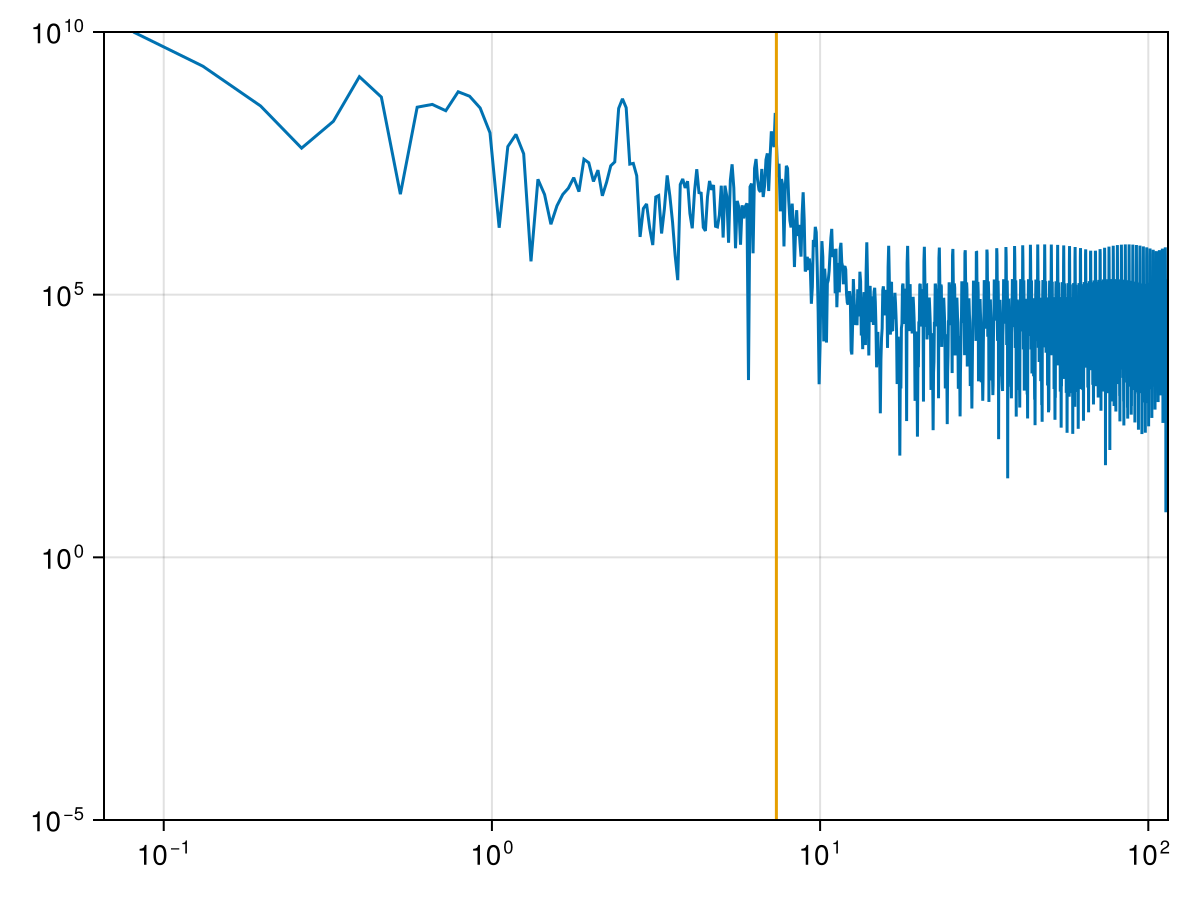

In [11]:
data_file = 5
sqrtgH = 0.35 + 0.05 * (data_file - 1)
f0 = 3.0 * sqrtgH
grid = TwoDGrid(; Lx=2π, nx=512)
initial_data_file = jldopen("/scratch/nad9961/rsw_fourier/57381056/5/2/radial_data_k=008.jld2")

N = length(initial_data_file["t"])
println(keys(initial_data_file))
N_half = Int((N)//2)+1
t = initial_data_file["t"]
dt = t[2] - t[1]
data = initial_data_file["ut"]
println(initial_data_file["k"]^2 + grid.l[12]^2)
println(grid.Krsq[8, 12])
close(initial_data_file)
ω = fftshift(fftfreq(N, 1/dt)) * 2*pi
test_fig = Figure()
ax = Axis(test_fig[1,1]; xscale=log10, yscale=log10,
    limits=((ω[N_half+1], ω[end]), (1e-5, 1e10)))
#lines!(ax, ω, abs2.(fftshift(data, 1)[:,120]))
lines!(ax, ω[N_half+1:end], abs2.(fftshift(data, 1)[N_half+1:end,12]), label="positive")
ω_peak = sqrt.(f0.^2 + sqrtgH^2 * grid.Krsq[8, 12])
lines!(ax, [ω_peak, ω_peak], [1e-5, 1e10])
#axislegend(ax, position=:lb)
test_fig

In [9]:
initial_data_file["k"] + grid.l[12]^2

LoadError: ArgumentError: file is closed

In [3]:
println(size(ω))
println(size(data))

(10868,)
(10868, 512)


In [4]:
grid = TwoDGrid(CPU(); nx=512, Lx=2π, aliased_fraction=0, T=Float64)
initial_data_file

JLDFile /scratch/nad9961/rsw_fourier/57152396/1/radial_data_k=001.jld2 (read-only)
  (closed)

In [5]:
window = hann(N)
initial_data_file = jldopen("/scratch/nad9961/rsw_fourier/57152396/1/radial_data_k=001.jld2")
UT = initial_data_file["ut"]
close(initial_data_file)
lines!(abs2.(UT)[:,1])
UT

LoadError: UndefVarError: `hann` not defined

In [41]:
println((Sys.total_memory() - Sys.free_memory()) / 2^33, " GB used")

7.876870632171631 GB used


In [11]:

radii

0.5:0.5:255.0

In [12]:
k_idx = 12
filename = @sprintf("/scratch/nad9961/rsw_fourier/57355300/%d/radial_data_k=%03d.jld2", ceil(Int,k_idx/4), k_idx)
data_file = jldopen(filename)
#println(size(data_file["c0t"]))
println(size(data_file["c0t"]))
chosen_weights = [weights[k_idx, :] for weights=weight_matrix]

y = eachslice(abs2.(data_file["c0t"]), dims=1)
result = chosen_weights' .* y
println(size(result))

#println(size(weight_matrix[:,k_idx, :]' .* data_file["c0t"]))
close(data_file)

(3495, 512)
(3495, 510)


In [13]:
maximum(chosen_weights' .* y)

1.2052696038619853e11

In [17]:
grid = TwoDGrid(; Lx=2π, nx=512)
radii, weight_matrix = create_radialspectrum_weights(grid, 2);

C0_data = zeros(N, length(radii))
Cp_data = zeros(N, length(radii))
Cn_data = zeros(N, length(radii))

run_idx = 5
k_max = 256

for k_idx=1:k_max
    data_file = nothing
    filename = @sprintf("/scratch/nad9961/rsw_fourier/57355300/%d/%d/radial_data_k=%03d.jld2", run_idx, ceil(Int,k_idx/4), k_idx)
    
    if !isfile(filename) 
        println("Missing file: " * filename)
        continue
    end
    println(filename)
    data_file = jldopen(filename)
    
    chosen_weights = [weights[k_idx, :] for weights=weight_matrix]
    C0slice = eachslice(abs2.(data_file["c0t"]), dims=1)
    Cpslice = eachslice(abs2.(data_file["c+t"]), dims=1)
    Cnslice = eachslice(abs2.(data_file["c-t"]), dims=1)
    C0_data += chosen_weights' .* C0slice
    Cp_data += chosen_weights' .* Cpslice
    Cn_data += chosen_weights' .* Cnslice

    close(data_file)
    data_file = nothing
    GC.gc()
end

/scratch/nad9961/rsw_fourier/57355300/5/1/radial_data_k=001.jld2
/scratch/nad9961/rsw_fourier/57355300/5/1/radial_data_k=002.jld2
/scratch/nad9961/rsw_fourier/57355300/5/1/radial_data_k=003.jld2
/scratch/nad9961/rsw_fourier/57355300/5/1/radial_data_k=004.jld2
/scratch/nad9961/rsw_fourier/57355300/5/2/radial_data_k=005.jld2
/scratch/nad9961/rsw_fourier/57355300/5/2/radial_data_k=006.jld2
/scratch/nad9961/rsw_fourier/57355300/5/2/radial_data_k=007.jld2
/scratch/nad9961/rsw_fourier/57355300/5/2/radial_data_k=008.jld2
/scratch/nad9961/rsw_fourier/57355300/5/3/radial_data_k=009.jld2
/scratch/nad9961/rsw_fourier/57355300/5/3/radial_data_k=010.jld2
/scratch/nad9961/rsw_fourier/57355300/5/3/radial_data_k=011.jld2
/scratch/nad9961/rsw_fourier/57355300/5/3/radial_data_k=012.jld2
/scratch/nad9961/rsw_fourier/57355300/5/4/radial_data_k=013.jld2
/scratch/nad9961/rsw_fourier/57355300/5/4/radial_data_k=014.jld2
/scratch/nad9961/rsw_fourier/57355300/5/4/radial_data_k=015.jld2
/scratch/nad9961/rsw_four

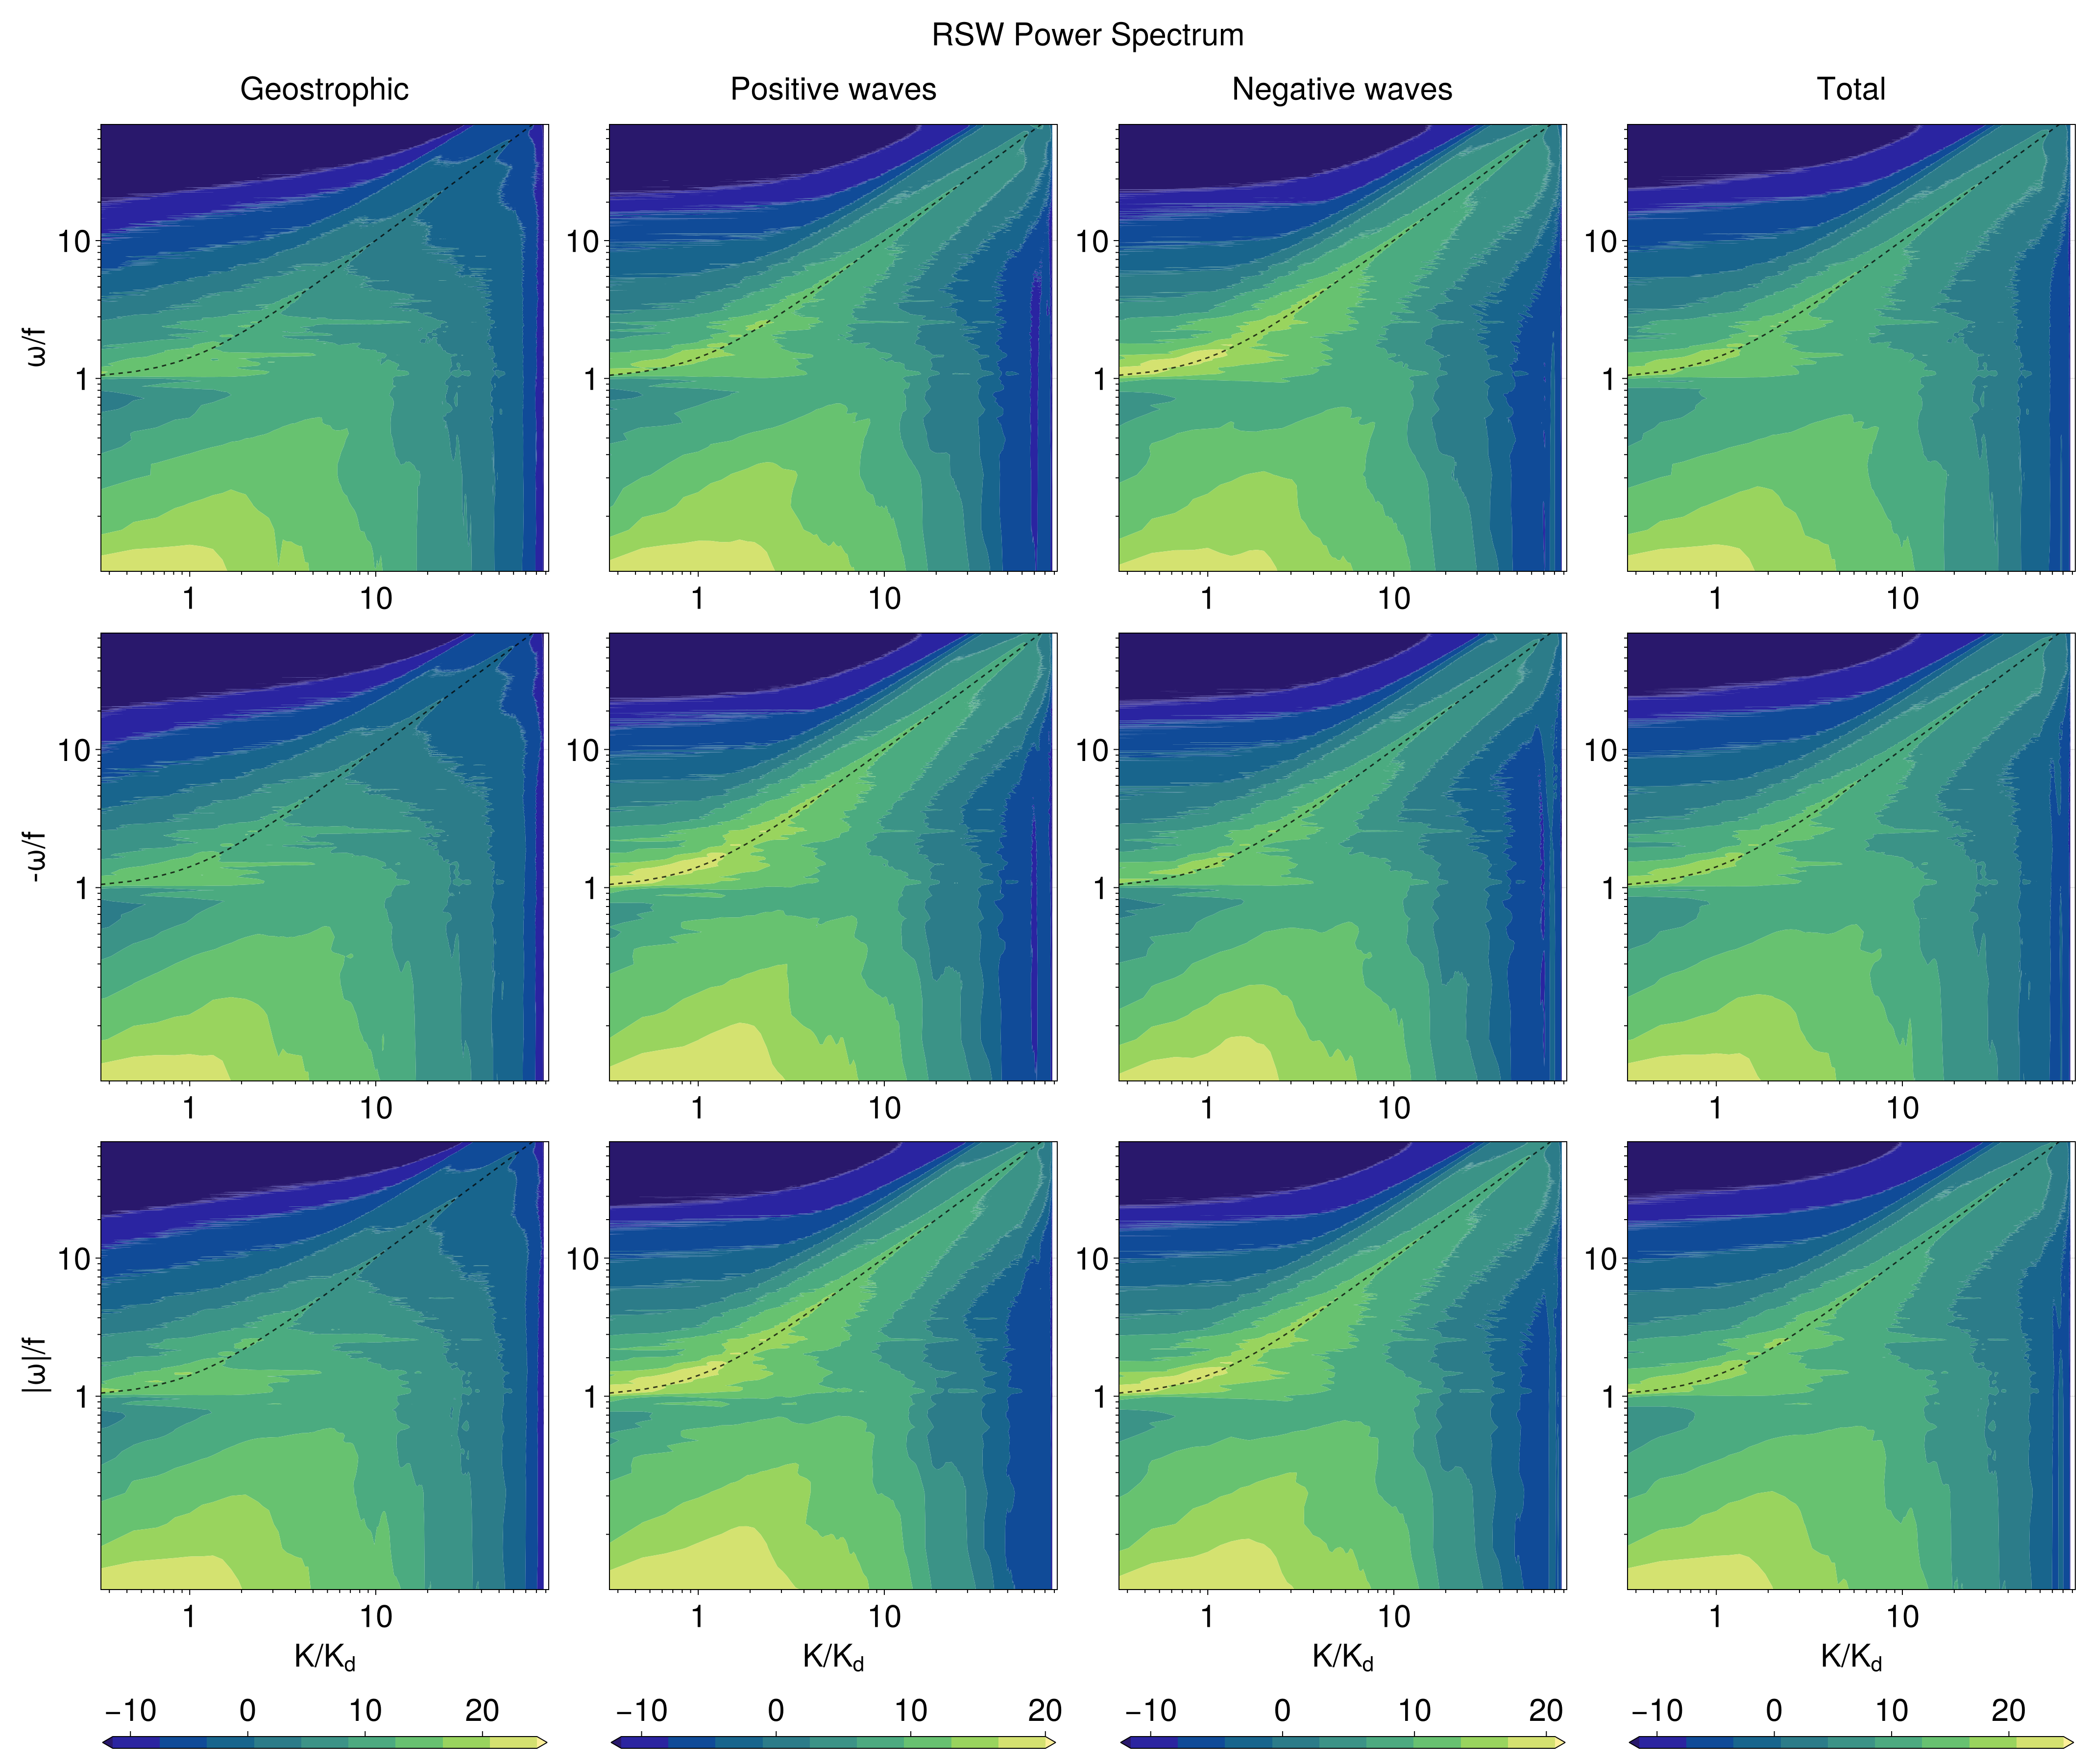

In [29]:
K_max = 256
sqrtgH = 0.55
f0 = 3 * sqrtgH
K_d = f0/sqrtgH

C0_ndata = fftshift((C0_data) * grid.dx / grid.nx, 1)
Cp_ndata = fftshift((Cp_data) * grid.dx / grid.nx, 1)
Cn_ndata = fftshift((Cn_data) * grid.dx / grid.nx, 1)
T_ndata  = C0_ndata + Cp_ndata + Cn_ndata
data_order = [C0_ndata, Cp_ndata, Cn_ndata, T_ndata]

fig = Figure(size=(2400, 1800), fontsize=32)
Label(fig[-1, 1:4], "RSW Power Spectrum")
Label(fig[0, 1], "Geostrophic")
Label(fig[0, 2], "Positive waves")
Label(fig[0, 3], "Negative waves")
Label(fig[0, 4], "Total")
axis_options = (xscale=log10, yscale=log10,
    xticks = [1, 10], yticks=[1, 10, 100],
    xminorticks=IntervalsBetween(10), yminorticks=IntervalsBetween(10),
    limits=(((radii[2])/K_d, radii[end]/K_d), (ω[N_half+2]/f0, ω[end]/f0)),
    xminorticksvisible = true, yminorticksvisible = true)


for data_type = 1:4
    y_data = ω[N_half+2:end]/f0
    x_data = (radii[2:end].-0.5)/K_d
    ylabel="ω/f"
    test_data = log.(data_order[data_type])
    min_val = minimum(test_data)
    max_val = maximum(test_data)
    colorlimits=(-15, 25)
    levels=range(colorlimits[1], colorlimits[2], length=10)
    for freq_sign = 1:3
        data = data_order[data_type]
        if freq_sign == 1
            data = data[N_half+2:end, 2:end]
        elseif freq_sign == 2
            data = data[N_half:-1:1, 2:end]
            ylabel="-ω/f"
        else
            data = data[N_half:-1:1, 2:end] + data[N_half+2:end, 2:end]
            ylabel = "|ω|/f"
        end
        ax = Axis(fig[freq_sign, data_type]; axis_options...)
        if(data_type == 1)
            ax.ylabel = ylabel
        end
        if(freq_sign == 3)
            ax.xlabel = rich("K/K", subscript("d"))
        end
        cf = contourf!(ax, x_data, y_data, log.(data'), colormap=:haline, levels=levels, extendlow = :auto, extendhigh = :auto)
        if(freq_sign == 1)
            cb = Colorbar(fig[4, data_type], cf, vertical = false)
        end
        lines!(ax, x_data, sqrt.(f0^2 .+ (sqrtgH * K_d*(x_data)).^2)/f0, linestyle=:dash, color="black", alpha=0.75)
    end
end

colsize!(fig.layout, 1, Aspect(1, 1.0))
colsize!(fig.layout, 2, Aspect(1, 1.0))
colsize!(fig.layout, 3, Aspect(1, 1.0))
colsize!(fig.layout, 4, Aspect(1, 1.0))
resize_to_layout!(fig)

fig

In [33]:
sqrtgH

0.55

In [192]:
size(C0_data)

(10868, 510)

In [181]:
save("../images/full_omega_spec.png", fig)

CairoMakie.Screen{IMAGE}


In [106]:
sum(Cp_data + Cn_data)

6.313561512696095e15

In [19]:
f = Figure(size=(1000, 600), fontsize=32)
ax = Axis(f[1,1], title="RSW power spectrum summed over ω", 
    xlabel="ω/f", ylabel="E(ω)",
    xscale=log10, yscale=log10,
    limits=((ω[N_half+2], ω[end]), (1e-8, 1e-1)),
    xticks = [0.1, 1, 10, 100])

#cmap = cgrad(:viridis, scale=log10)
bc_data = sum(scaled_U_data[N_half-1:-1:2,:], dims=2)[:] + 
        #sum(vc_data[N_half:-1:1,:], dims=2)[:] + 
        sum(scaled_U_data[N_half+2:end,:], dims=2)[:]
        #sum(vc_data[N_half+2:end,:], dims=2)[:]
bc_data *= dt / N / grid.nk / grid.nl
#bw_data = sum(uw_data[N_half:-1:1,:], dims=2)[:] + 
#        sum(vw_data[N_half:-1:1,:], dims=2)[:] + 
#        sum(uw_data[N_half+2:end,:], dims=2)[:] + 
#        sum(vw_data[N_half+2:end,:], dims=2)[:]

lines!(ax, ω[N_half+2:end], bc_data, label="total velocity", linewidth=3)
#lines!(ax, ω[N_half+2:end], bw_data/2e8, label="wave components", linewidth=3)
pos_ω = ω[N_half+2:end]
lines!(ax, pos_ω, 5e-3*pos_ω.^(-2.00), label=L"ω^{-2.00}", linestyle=:dash, color="black", linewidth=3)
#hm = contourf!(ax, k_centers, -ω[1:N_half], log.(rotary_v[1:N_half,:]'), levels=40)
#lines!(ax, k_centers, sqrt.(1 .+ k_centers.^2), linestyle=:dash, color="black")
#contour!(ax, k_centers, ω[N_half+2:end],  rotary_v[N_half+2:end,:]')
#cb = Colorbar(f[1,2], hm)
axislegend(ax)
f

LoadError: UndefVarError: `scaled_U_data` not defined

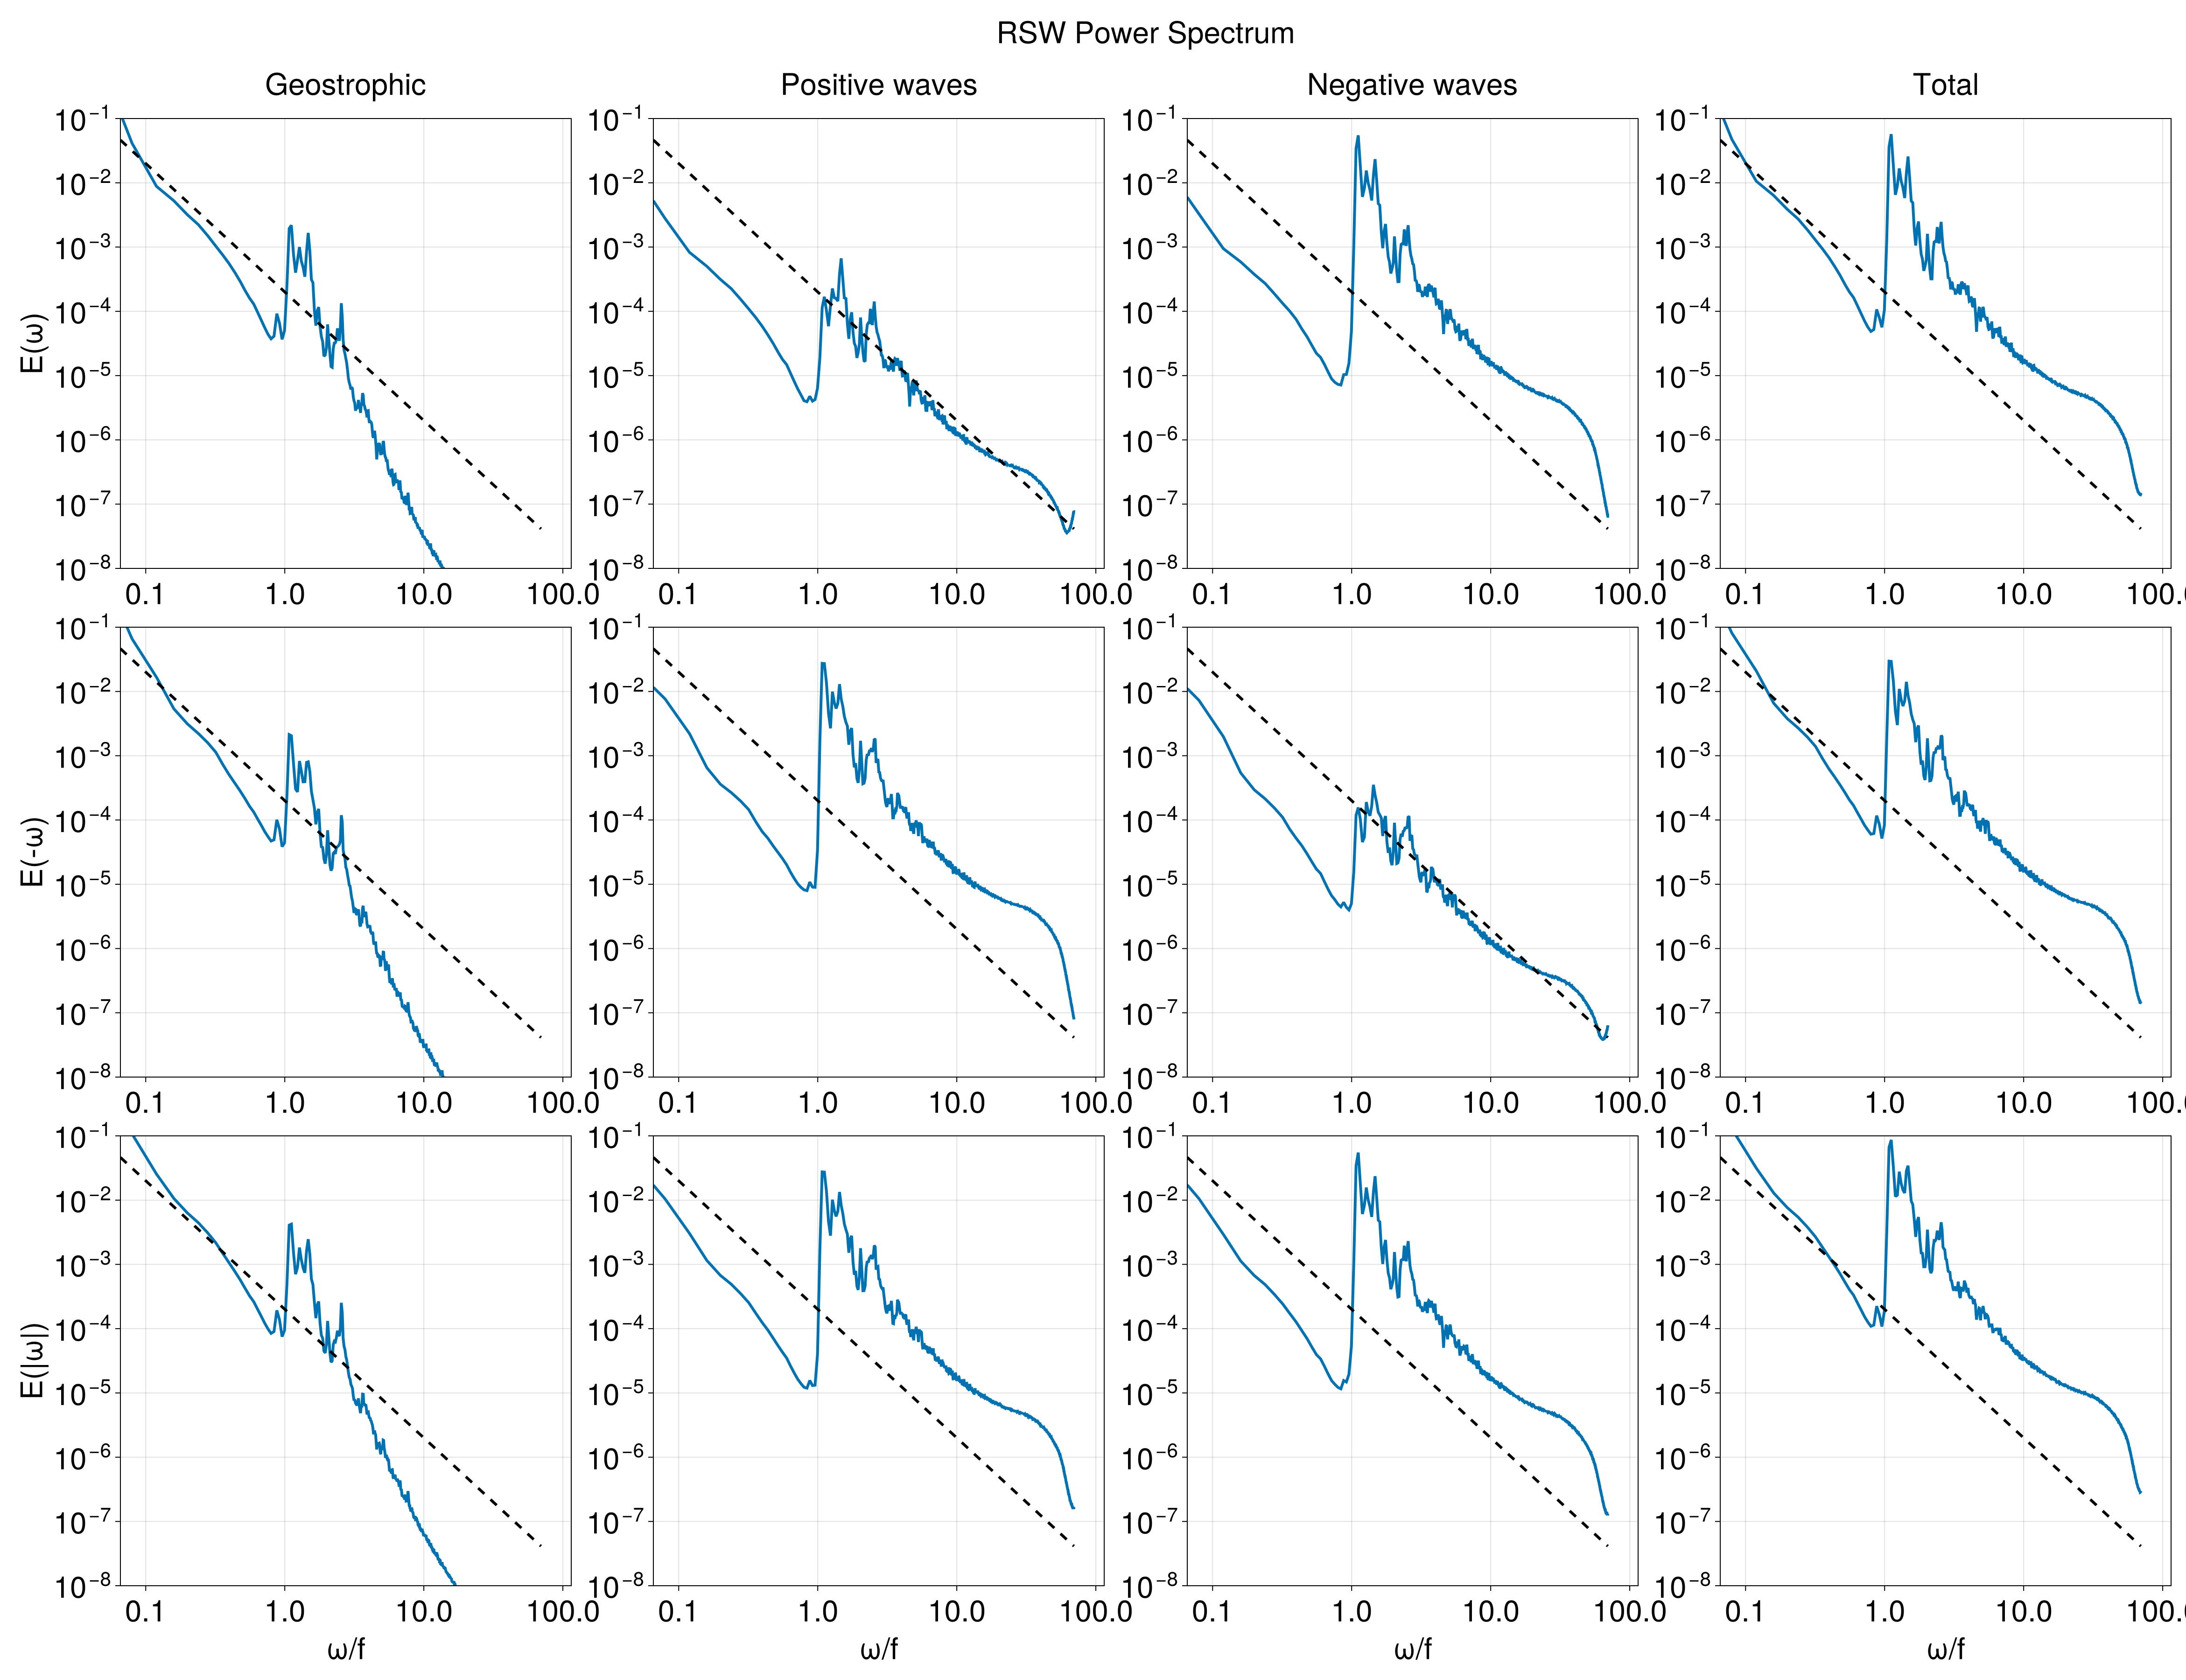

In [21]:
K_max = 256
K_d = 3
f0 = 3 * 0.55

C0_ndata = fftshift((C0_data) * grid.dx / grid.nx, 1) * dt / N / grid.nk / grid.nl
Cp_ndata = fftshift((Cp_data) * grid.dx / grid.nx, 1) * dt / N / grid.nk / grid.nl
Cn_ndata = fftshift((Cn_data) * grid.dx / grid.nx, 1) * dt / N / grid.nk / grid.nl
T_ndata  = C0_ndata + Cp_ndata + Cn_ndata
data_order = [C0_ndata, Cp_ndata, Cn_ndata, T_ndata]

fig = Figure(size=(2400, 1800), fontsize=32)
Label(fig[-1, 1:4], "RSW Power Spectrum")
Label(fig[0, 1], "Geostrophic")
Label(fig[0, 2], "Positive waves")
Label(fig[0, 3], "Negative waves")
Label(fig[0, 4], "Total")
axis_options = (xscale=log10, yscale=log10,
   limits=((ω[N_half+2], ω[end]), (1e-8, 1e-1)),
    xticks = [0.1, 1, 10, 100])


for data_type = 1:4
    y_data = ω[N_half+2:end]/f0
    ylabel="E(ω)"
    test_data = log.(data_order[data_type])
    for freq_sign = 1:3
        data = data_order[data_type]
        if freq_sign == 1
            data = data[N_half+2:end, 2:end]
        elseif freq_sign == 2
            data = data[N_half:-1:1, 2:end]
            ylabel="E(-ω)"
        else
            data = data[N_half:-1:1, 2:end] + data[N_half+2:end, 2:end]
            ylabel = "E(|ω|)"
        end
        ax = Axis(fig[freq_sign, data_type]; axis_options...)
        if(data_type == 1)
            ax.ylabel = ylabel
        end
        if(freq_sign == 3)
            ax.xlabel = "ω/f"
        end
        lines!(ax, y_data, sum(data, dims=2)[:], linewidth=3)
        lines!(ax, y_data, 2e-4*y_data.^(-2.00), linestyle=:dash, color="black", linewidth=3)
    end
end
colsize!(fig.layout, 1, Aspect(1, 1.0))
colsize!(fig.layout, 2, Aspect(1, 1.0))
colsize!(fig.layout, 3, Aspect(1, 1.0))
colsize!(fig.layout, 4, Aspect(1, 1.0))
resize_to_layout!(fig)

fig

In [187]:
save("../images/summed_omega_spec.png", fig)

CairoMakie.Screen{IMAGE}


1 1992
0.050195209163506664 99.98885665371309


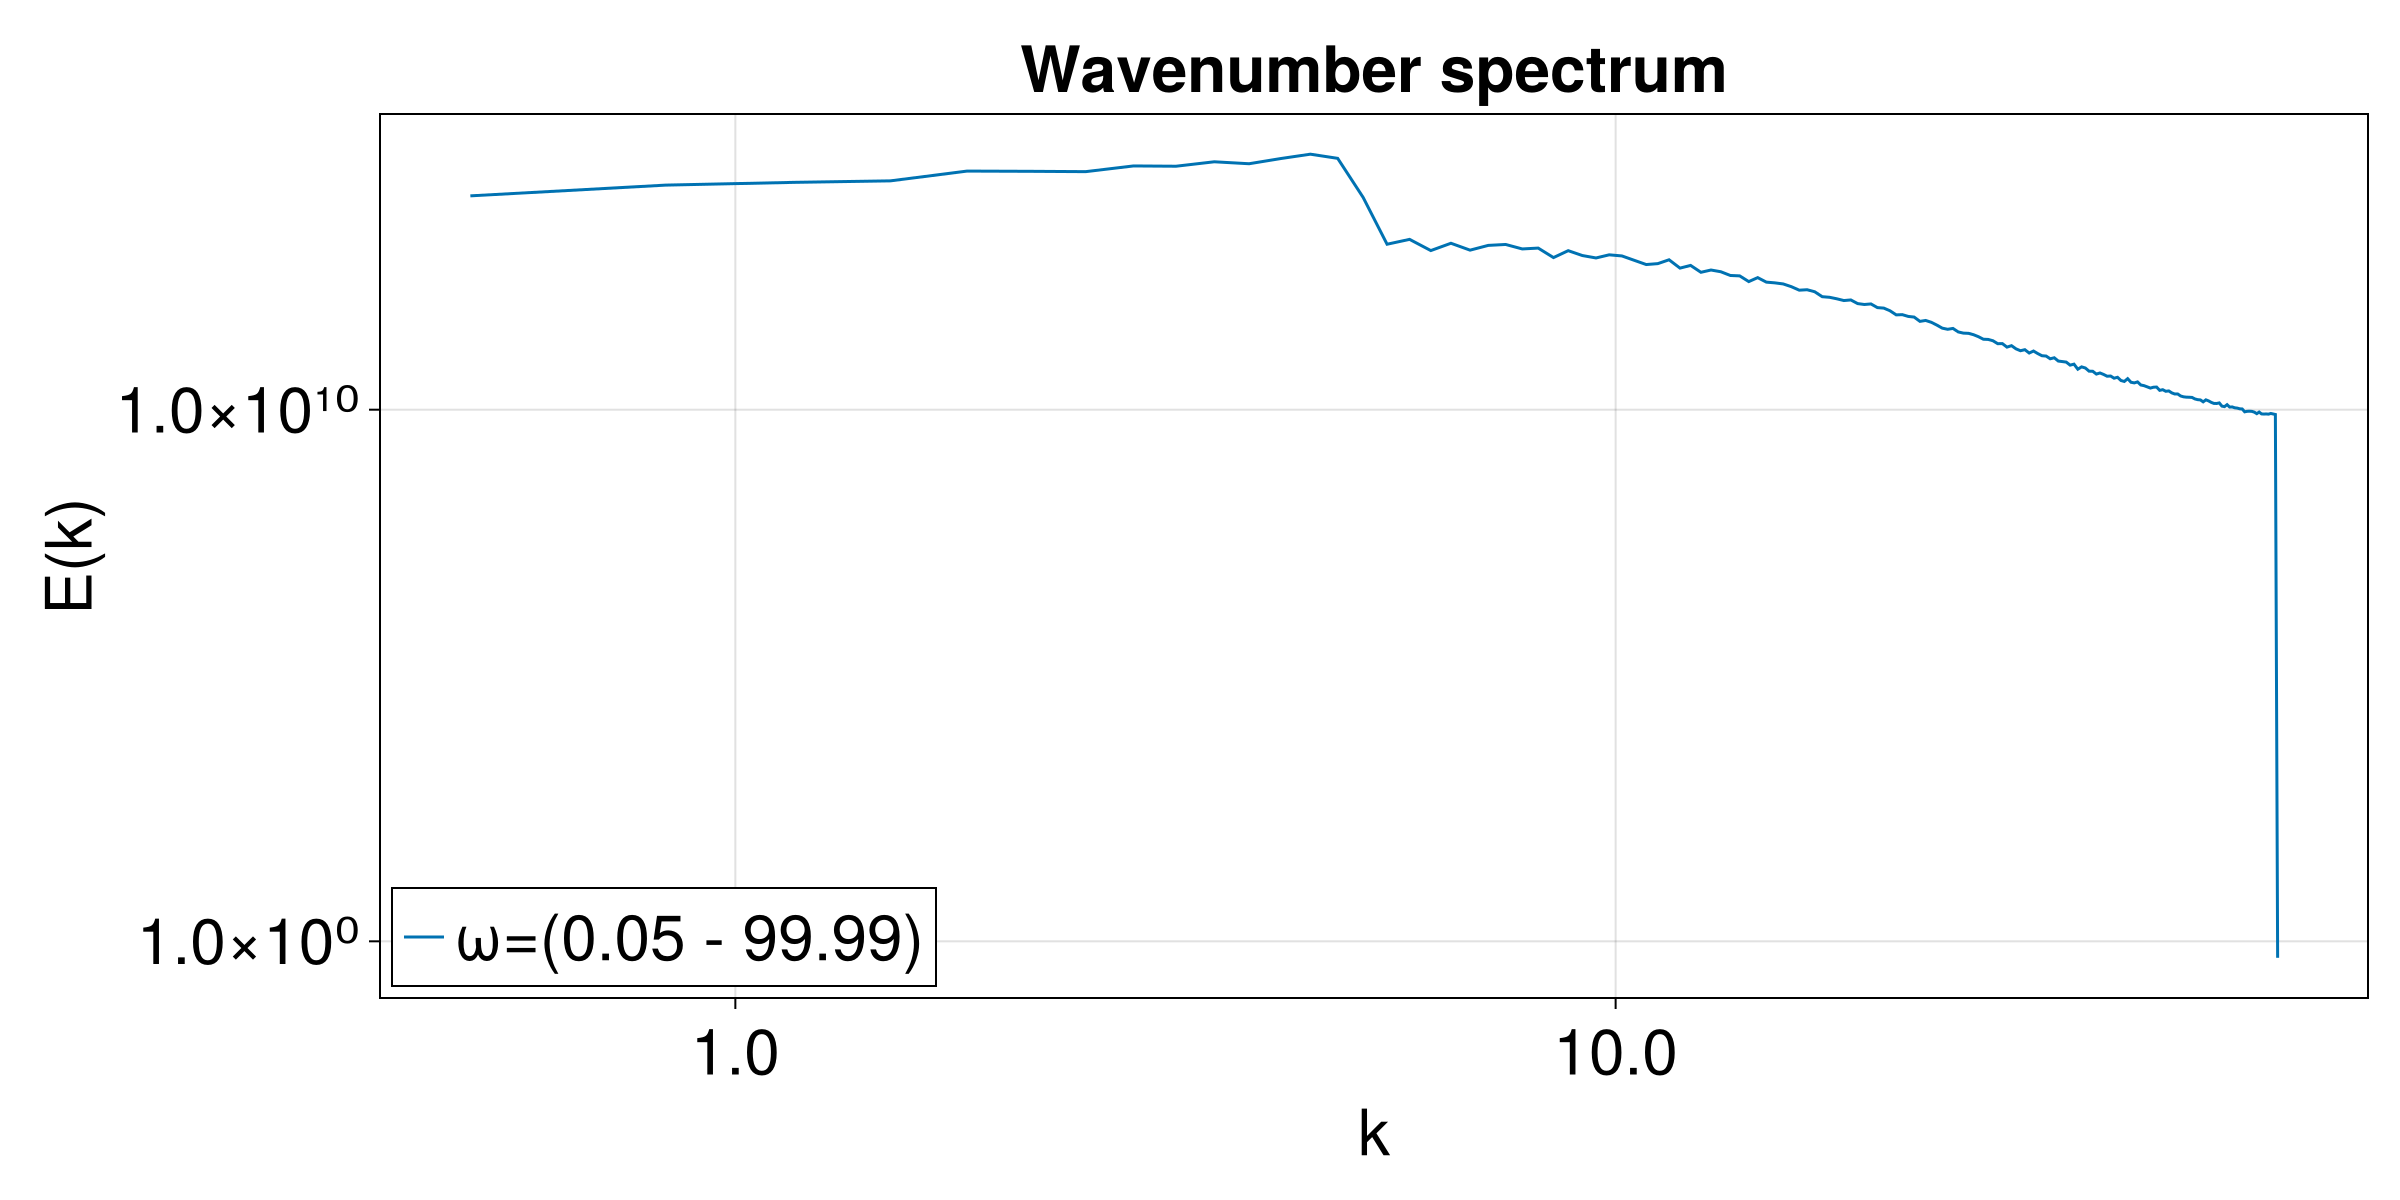

In [32]:
f = Figure(size=(1200, 600), fontsize=32)
ω_ranges = [[-1,100]]
ω_values = ω[N_half+2:end]
trend_multiplier = [1e10, 1e13, 5e9]

ax = Axis(f[1,1], title="Wavenumber spectrum", 
        xlabel="k", ylabel="E(k)",
        yticks=[1, 1e10],
        xticks=[1e-1, 1, 10],
        xscale=log10, yscale=Makie.pseudolog10)
for idx=1:length(ω_ranges)
    ω_range = ω_ranges[idx]
    ω_min_idx = findfirst(ω -> ω > ω_range[1], ω_values)
    ω_max_idx = findfirst(ω -> ω > ω_range[2], ω_values) - 1
    println(ω_min_idx, " ", ω_max_idx)
    println(ω_values[ω_min_idx], " ", ω_values[ω_max_idx])


    y_data = sum(uc_data[(N_half+1-ω_min_idx):-1:(N_half+1-ω_max_idx),2:K_max], dims=1)[:] + 
             sum(vc_data[(N_half+1-ω_min_idx):-1:(N_half+1-ω_max_idx),2:K_max], dims=1)[:] + 
             sum(uc_data[(N_half+1+ω_min_idx):(N_half+1+ω_max_idx),2:K_max], dims=1)[:] + 
             sum(vc_data[(N_half+1+ω_min_idx):(N_half+1+ω_max_idx),2:K_max], dims=1)[:]

    #pos_ω = ω_values[ω_min_idx:ω_max_idx]
    lines!(ax, k_values[2:K_max], y_data, label=@sprintf("ω=(%.2f - %.2f)", ω_values[ω_min_idx], ω_values[ω_max_idx]))
    #lines!(ax, pos_ω, trend_multiplier[idx]*pos_ω.^(-2.00), label=L"ω^{-2.00}", linestyle=:dash, color="black")
end
axislegend(ax, position=:lb)
#hm = contourf!(ax, k_centers, -ω[1:N_half], log.(rotary_v[1:N_half,:]'), levels=40)
#lines!(ax, k_centers, sqrt.(1 .+ k_centers.^2), linestyle=:dash, color="black")
#contour!(ax, k_centers, ω[N_half+2:end],  rotary_v[N_half+2:end,:]')
#cb = Colorbar(f[1,2], hm)

f

In [94]:
ω_range = ω_ranges[3]
ω_min_idx = findfirst(ω -> ω > ω_range[1], ω_values)
ω_max_idx = findfirst(ω -> ω > ω_range[2], ω_values) - 1
println(ω_values[ω_min_idx])
println(ω_values[ω_max_idx])
ω[(N_half+1+ω_min_idx):(N_half+1+ω_max_idx)]
ω[(N_half+1-ω_min_idx):-1:(N_half+1-ω_max_idx)]

8.050027563869232
627.9576674132732


-8.050027563869183:-0.05551743147496005:-627.957667413273

In [51]:
x = [4, 5, 6, 7, 8]
println(findfirst(y -> y > 6, x))

4


In [19]:
grid = TwoDGrid(; Lx=6π, nx=512)
grid.nkr

257

In [130]:
initial_data_file = jldopen("/scratch/nad9961/thomasyamada_fourier/47587522/radial_data_k=001.jld2")
N = length(data_file["t"])
t = data_file["t"]
dt = t[2] - t[1]
close(initial_data_file)

N_half = Int((N-1)//2)
max_k = 60
k_centers = zeros(max_k)
rotary_v = zeros(N, max_k)
energy = zeros(N, max_k)

grid = TwoDGrid(; Lx=6π, nx=512)
dk = grid.kr[2] - grid.kr[1]

ω = fftshift(fftfreq(N, 1/dt)) * 2*pi

dt = base_file["snapshots/t/2"] - base_file["snapshots/t/1"]
for k_idx = 1:max_k
    data_file = jldopen(@sprintf("/scratch/nad9961/thomasyamada_fourier/47545732/radial_data_k=%03d.jld2", k_idx))
    k_filter =  data_file["k"]
    k_centers[k_idx] = sqrt(minimum(grid.Krsq[k_filter])) + dk/2
    rotary_v[:,k_idx] = fftshift(data_file["radial_rotary"])
    energy[:,k_idx] = fftshift(data_file["radial_energy"])
end

0.055517431474984995


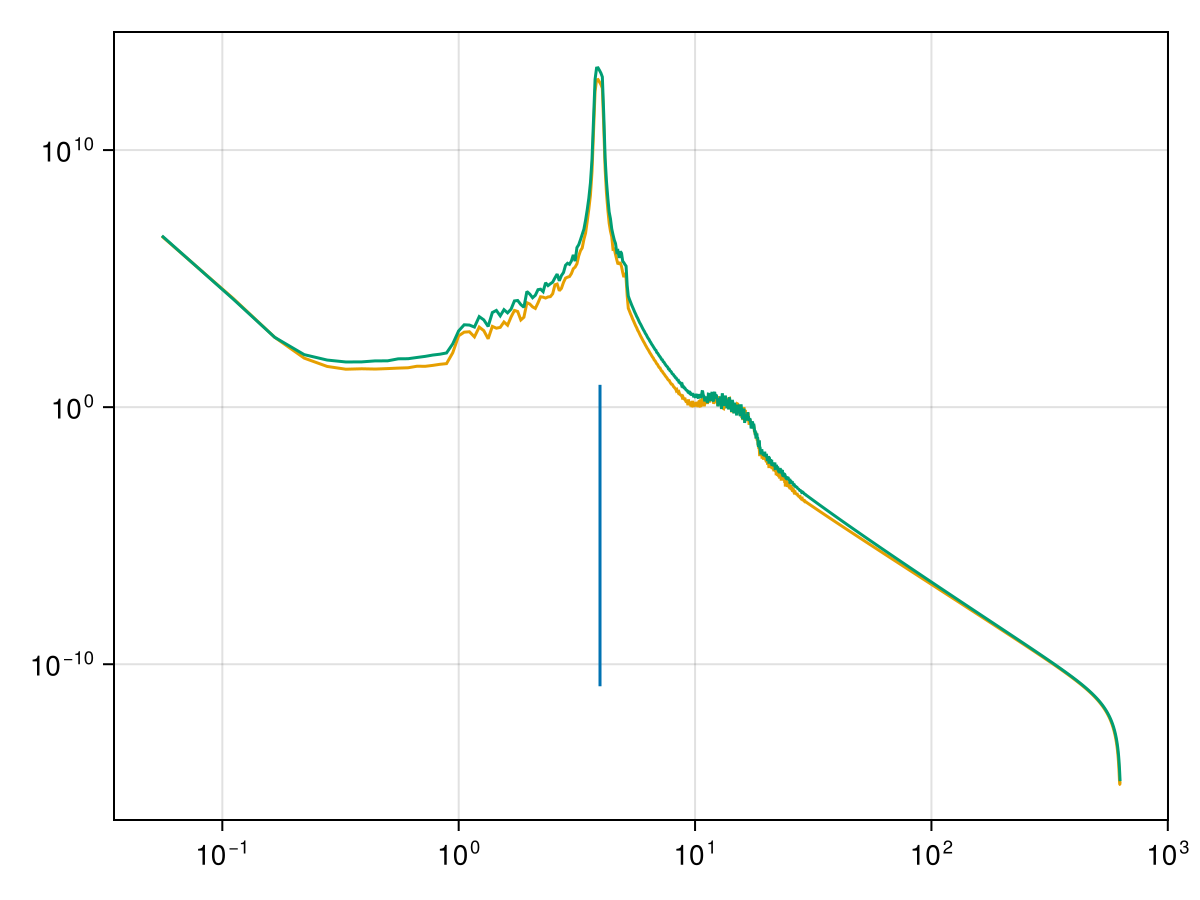

In [152]:
idx = 12
data = rotary_v[:,idx]
println(ω[N_half+2])

dispersion = sqrt(1 + (k_centers[idx])^2)

fig = Figure()
ax = Axis(fig[1,1], xscale=log10, yscale=log10)
lines!(ax, dispersion .+ 0*(-2:25), exp.(-25:2))
lines!(ax, ω[N_half+2:end], data[N_half+2:end])
lines!(ax, -ω[1:N_half], data[1:N_half])

fig

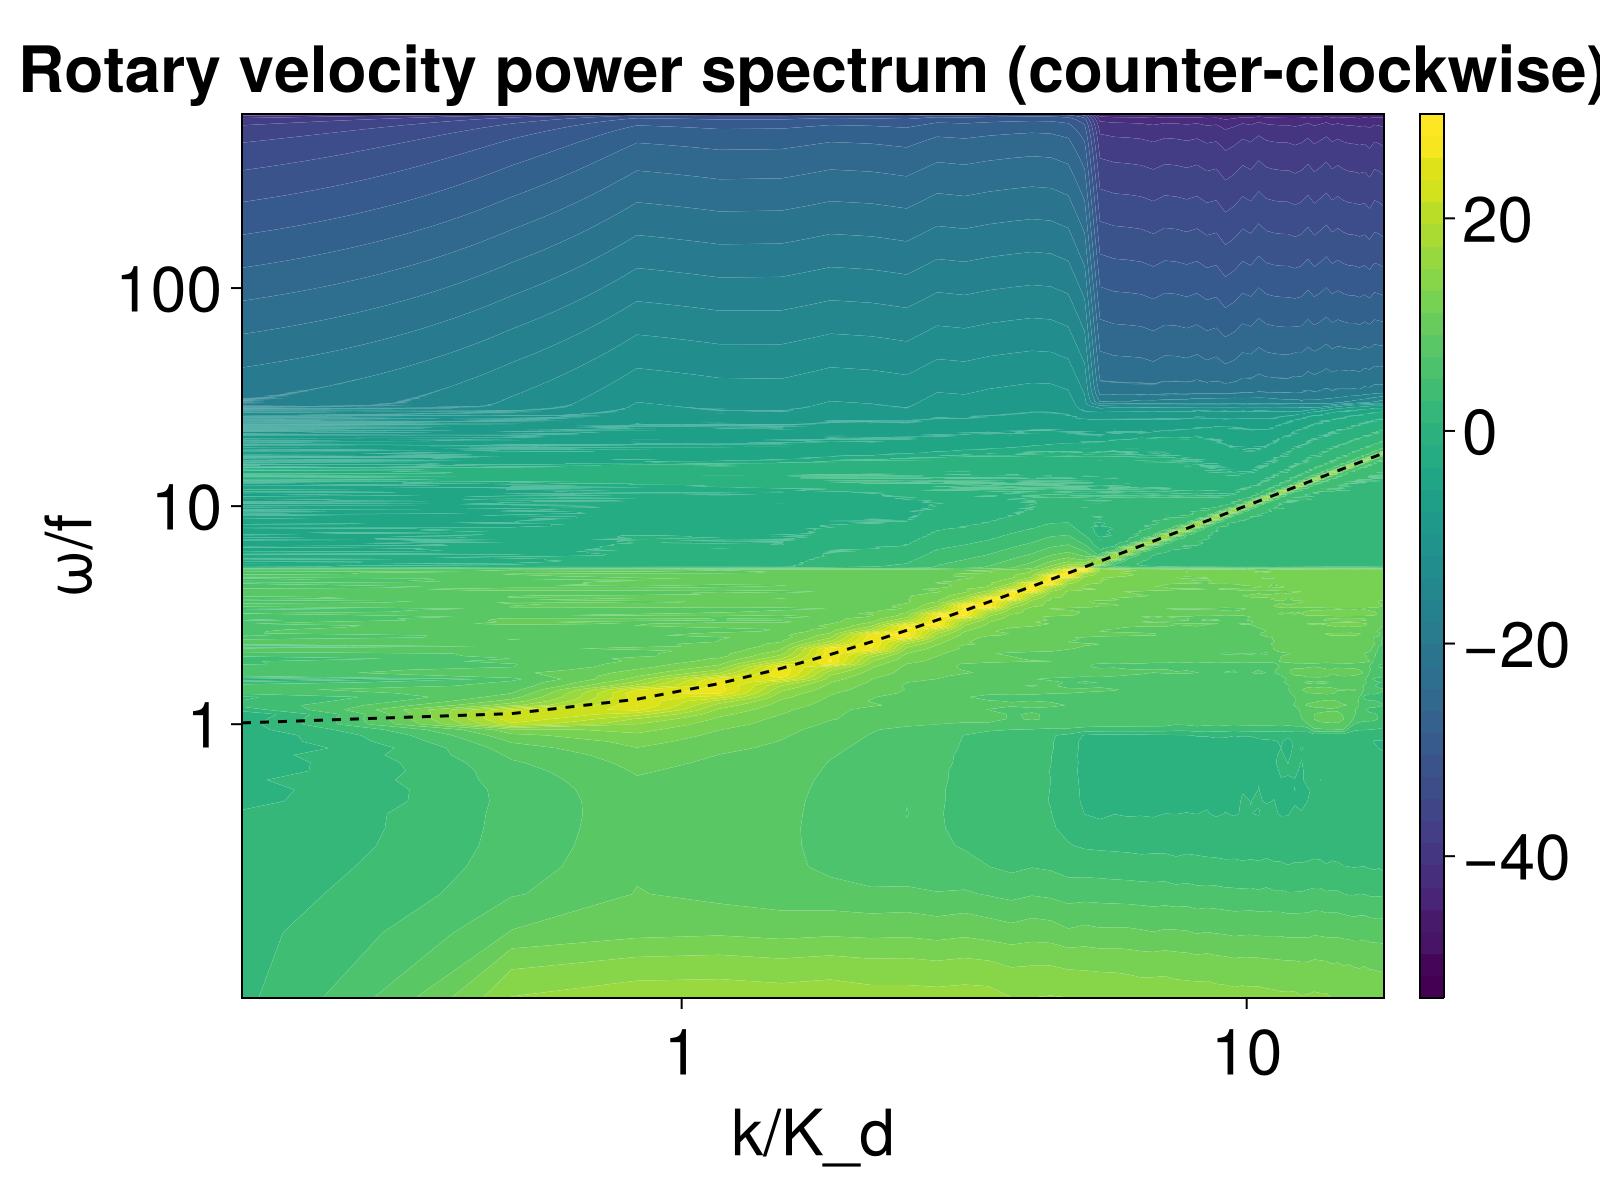

In [148]:
f = Figure(size=(800, 600), fontsize=32)
ax = Axis(f[1,1], title="Rotary velocity power spectrum (counter-clockwise)", 
    xlabel="k/K_d", ylabel="ω/f", 
    xscale=log10, yscale=log10,
    xticks = [1, 10], yticks=[1, 10, 100])

cmap = cgrad(:viridis, scale=log10)
hm = contourf!(ax, k_centers, ω[N_half+2:end], log.(rotary_v[N_half+2:end,:]'), levels=40)
lines!(ax, k_centers, sqrt.(1 .+ k_centers.^2), linestyle=:dash, color="black")
#contour!(ax, k_centers, ω[N_half+2:end],  rotary_v[N_half+2:end,:]')

cb = Colorbar(f[1,2], hm)

f

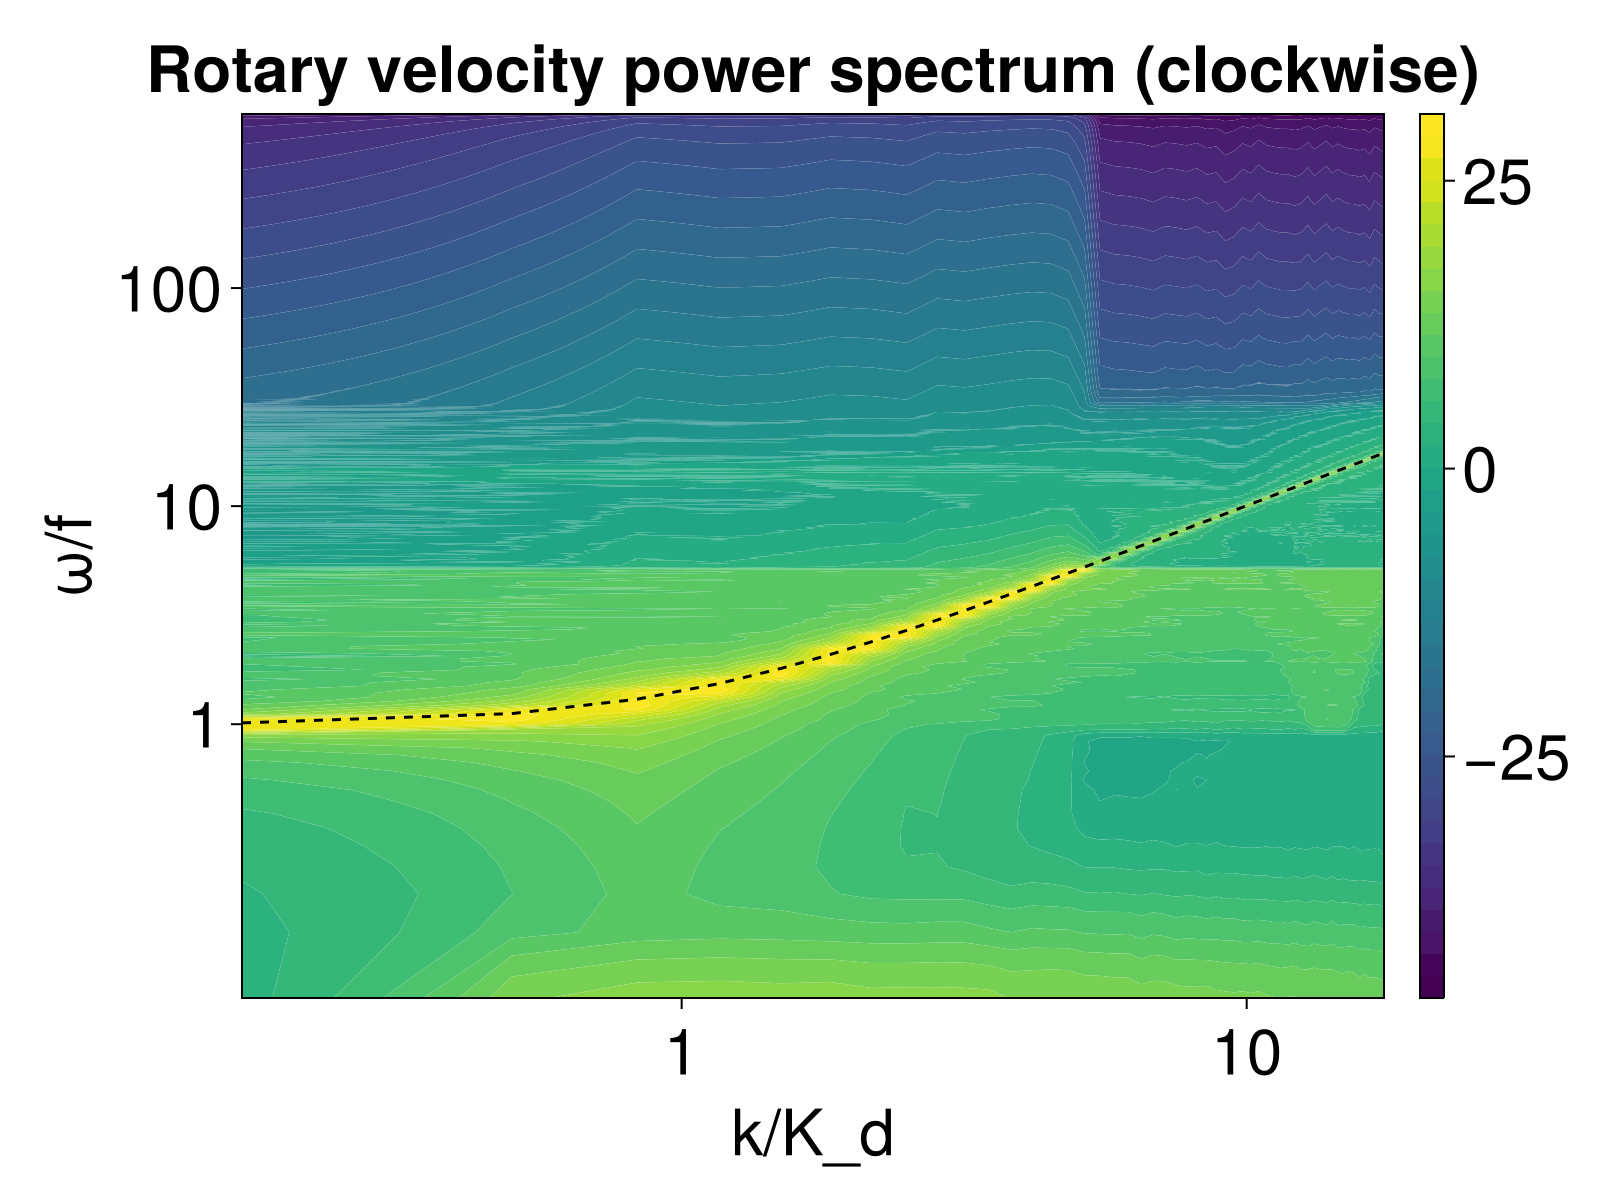

In [113]:
f = Figure(size=(800, 600), fontsize=32)
ax = Axis(f[1,1], title="Rotary velocity power spectrum (clockwise)", 
    xlabel="k/K_d", ylabel="ω/f", 
    xscale=log10, yscale=log10,
    xticks = [1, 10], yticks=[1, 10, 100])

cmap = cgrad(:viridis, scale=log10)
hm = contourf!(ax, k_centers, -ω[1:N_half], log.(rotary_v[1:N_half,:]'), levels=40)
lines!(ax, k_centers, sqrt.(1 .+ k_centers.^2), linestyle=:dash, color="black")
#contour!(ax, k_centers, ω[N_half+2:end],  rotary_v[N_half+2:end,:]')

cb = Colorbar(f[1,2], hm)

f

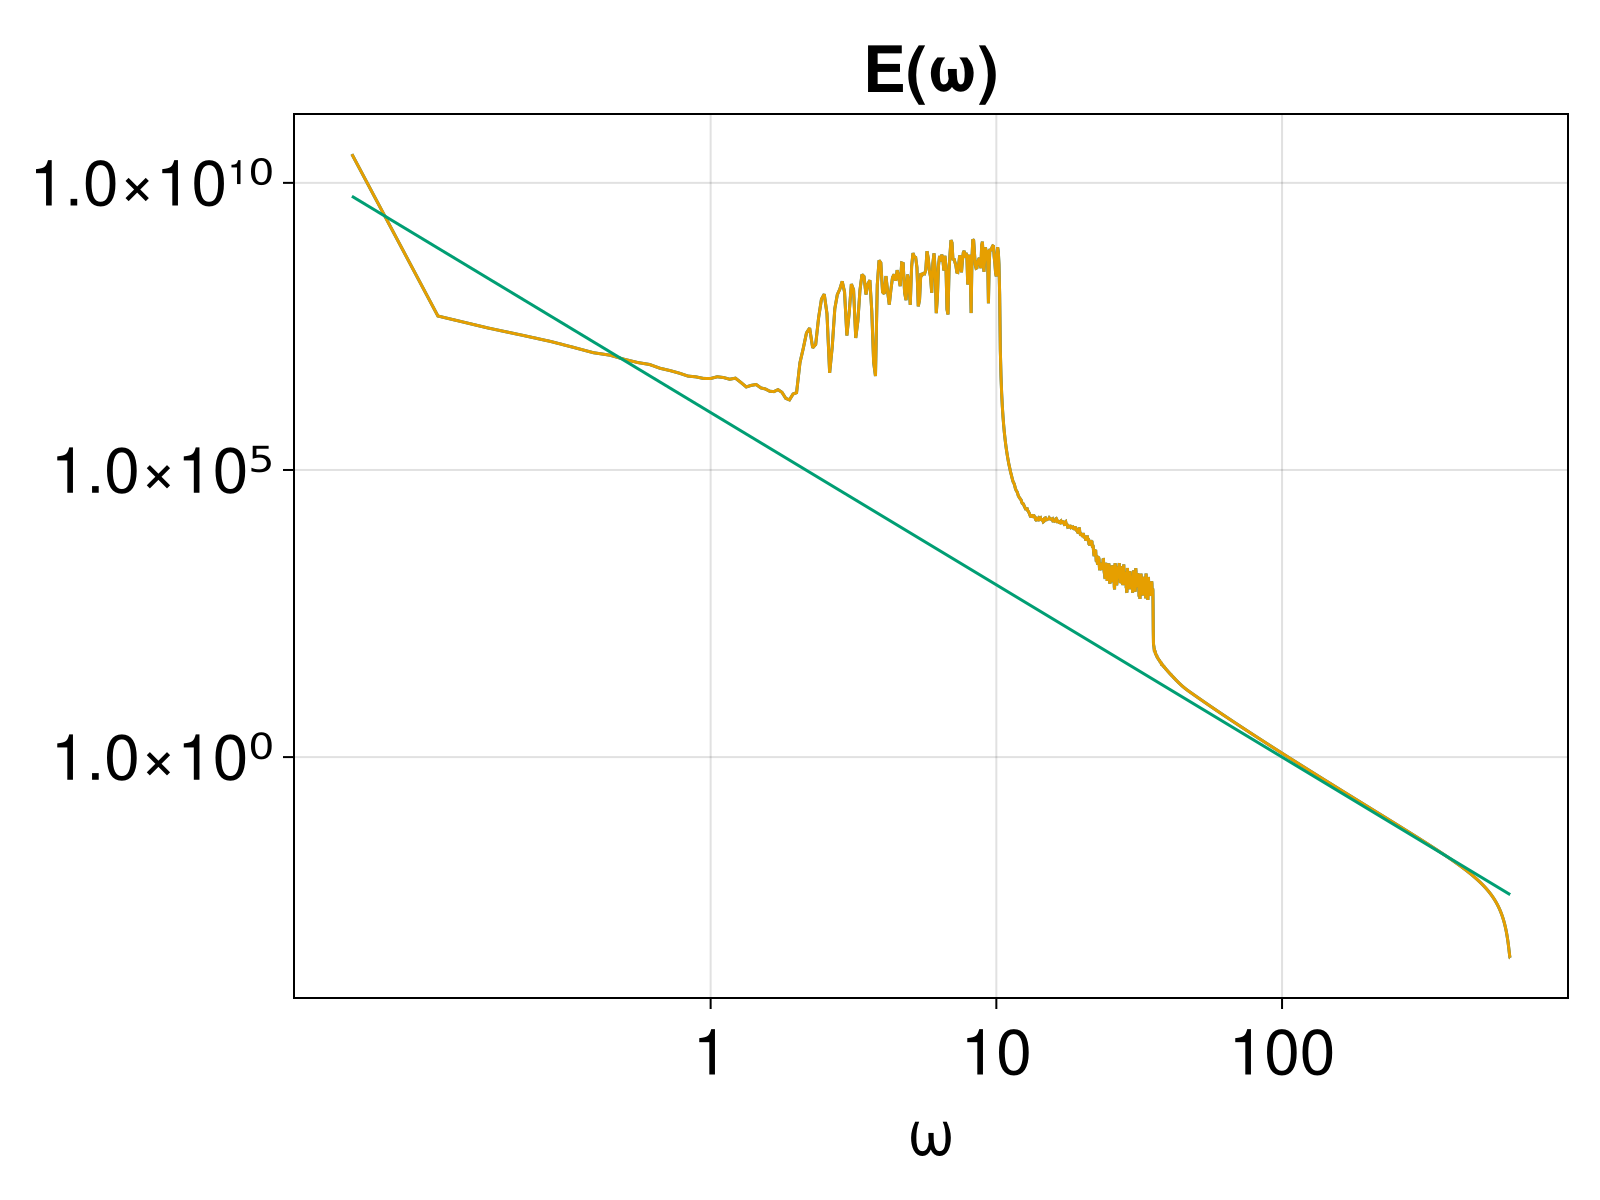

In [151]:
f = Figure(size=(800, 600), fontsize=32)
ax = Axis(f[1,1], title="E(ω)", 
    xlabel="ω", 
    xscale=log10, yscale=log10,
    xticks = [1, 10, 100], yticks=[1e-5, 1, 1e5, 1e10])

cmap = cgrad(:viridis, scale=log10)
lines!(ax, -ω[1:N_half], sum(energy[1:N_half,:], dims=2)[:])
lines!(ax, ω[N_half+2:end], sum(energy[N_half+2:end,:], dims=2)[:])
pos_ω = ω[N_half+2:end]
lines!(ax, pos_ω, 1e6*pos_ω.^(-3))
#hm = contourf!(ax, k_centers, -ω[1:N_half], log.(rotary_v[1:N_half,:]'), levels=40)
#lines!(ax, k_centers, sqrt.(1 .+ k_centers.^2), linestyle=:dash, color="black")
#contour!(ax, k_centers, ω[N_half+2:end],  rotary_v[N_half+2:end,:]')
#cb = Colorbar(f[1,2], hm)

f

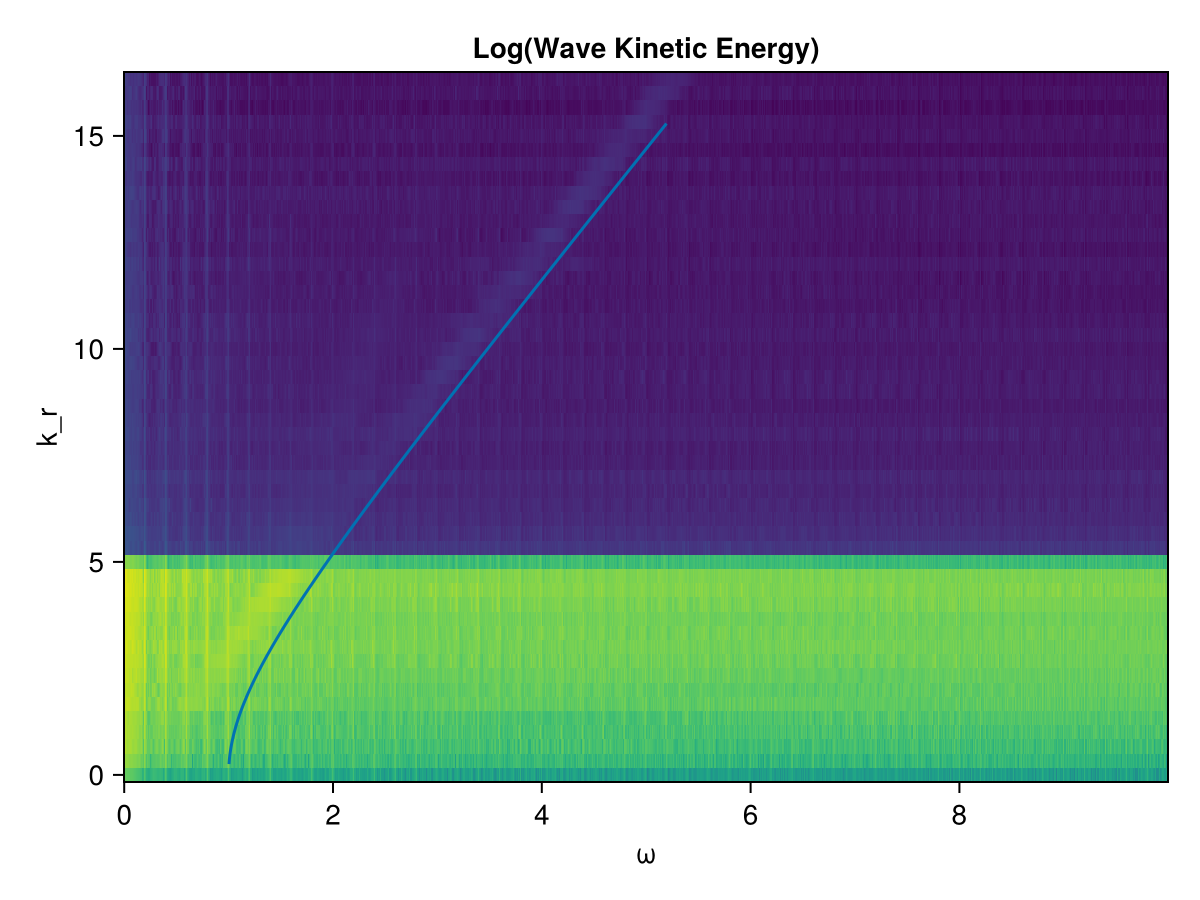

In [5]:
dt = base_file["snapshots/t/10"] - base_file["snapshots/t/0"]
nx = base_file["grid/nx"]
Lx = base_file["grid/Lx"]

wave_ke_abs_fourier = data_file["radial_energy"]
nω = size(wave_ke_abs_fourier, 1)
half_nω = Int(nω / 2)
nk = size(wave_ke_abs_fourier,2)

ks = fftfreq(nx, 2π/Lx * nx)
ωs = fftfreq(nω, 1/dt)
ωs_unidirectional = ωs[1:half_nω]
wave_ke_unidirectional = wave_ke_abs_fourier[1:half_nω,:] + wave_ke_abs_fourier[end:-1:half_nω+1,:]

f = Figure()
ax = Axis(f[1,1], title="Log(Wave Kinetic Energy)", xlabel="ω", ylabel="k_r")

heatmap!(ax, ωs_unidirectional, ks[1:nk], log.(wave_ke_unidirectional))

ω_min = findfirst(x -> x > 1, ωs_unidirectional)
ω_max = 1300#findfirst(x -> x >= sqrt((ks[end]/3)^2 + 1), ωs_unidirectional)
lines!(ax, ωs_unidirectional[ω_min:ω_max], 3*sqrt.(ωs_unidirectional[ω_min:ω_max].^2 .- 1))
f

In [154]:
grid.nkr

257

In [105]:
ωs_unidirectional[end].^2 < (ks[end]/3)^2 + 1

false

In [102]:
findfirst(x -> x >= sqrt((nk/3)^2 + 1), ωs_unidirectional)

In [104]:
3*sqrt.(ωs_unidirectional[ω_min:end].^2 .- 1)

2250-element Vector{Float64}:
  0.25473640711098594
  0.3704925454805238
  0.45817746031819667
  0.5318610850295311
  0.5967525551952989
  0.6554683670732013
  0.7095433165588021
  0.7599687004417293
  0.8074285745297101
  0.8524184125306299
  0.8953106538032267
  0.9363935889058896
  0.975895747307419
  ⋮
 29.704952012068638
 29.717008207463714
 29.729064353513866
 29.74112045027911
 29.753176497819354
 29.765232496194404
 29.777288445463995
 29.78934434568773
 29.801400196925137
 29.813455999235646
 29.82551175267859
 29.83756745731319

In [28]:
 base_file["grid/nx"]

512

In [29]:
plot(

512-element Frequencies{Float64}:
  0.0
  0.3333333333333333
  0.6666666666666666
  1.0
  1.3333333333333333
  1.6666666666666665
  2.0
  2.333333333333333
  2.6666666666666665
  3.0
  3.333333333333333
  3.6666666666666665
  4.0
  ⋮
 -4.0
 -3.6666666666666665
 -3.333333333333333
 -3.0
 -2.6666666666666665
 -2.333333333333333
 -2.0
 -1.6666666666666665
 -1.3333333333333333
 -1.0
 -0.6666666666666666
 -0.3333333333333333

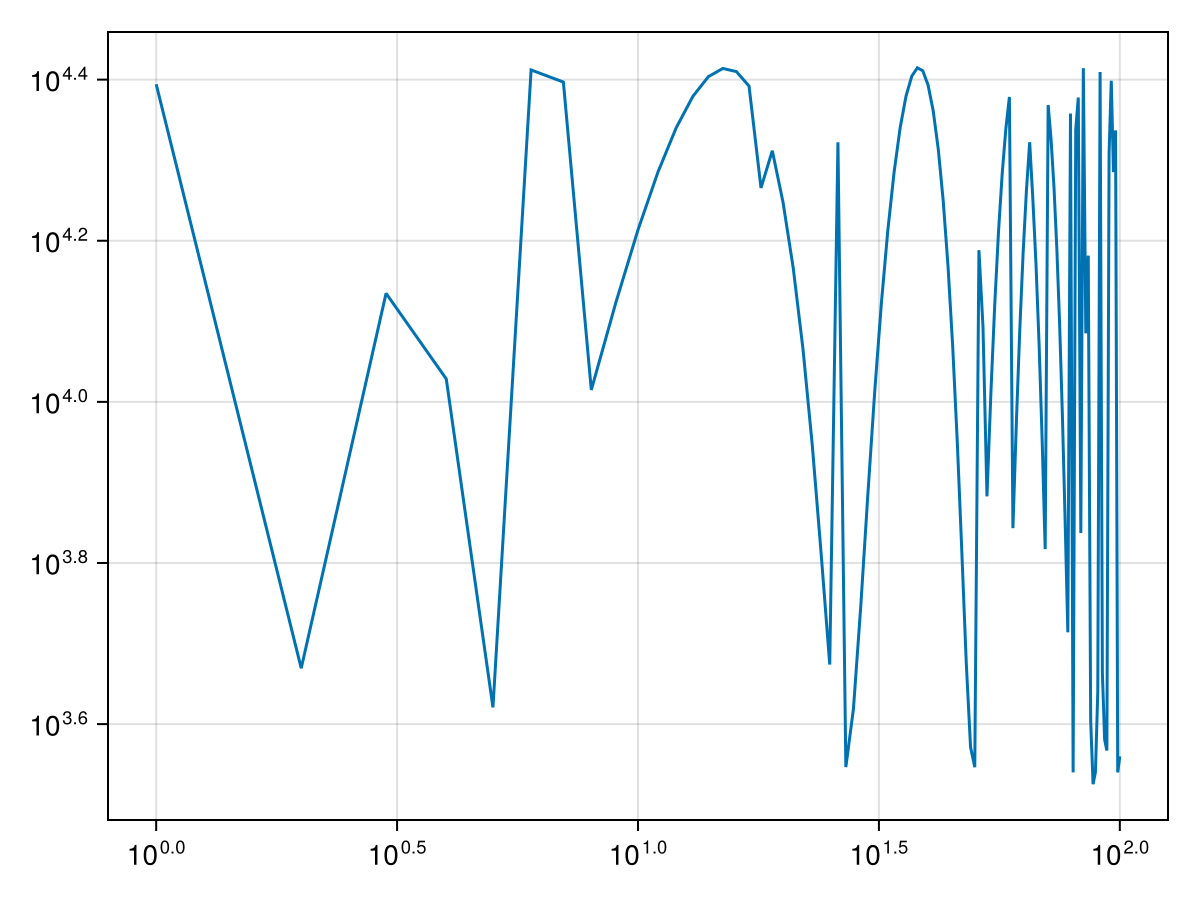

In [147]:
f = Figure()
ax = Axis(f[1,1], xscale=log10, yscale=log10)
lines!(ax, data_file["8/omega"][1:100,4])
f

In [126]:
data_file["9/omega"]

5002×29 Matrix{Float64}:
 24957.8   28757.7   11688.8  14943.4   …  26672.1   24935.4   27025.7
 26415.2   28302.6   15162.3  18558.7      25624.7   26567.4   26250.1
 26964.9   26854.8   18644.1  21863.6      23606.0   27234.7   24568.4
 26562.3   24532.1   21838.9  24559.4      20798.4   26880.6   22118.6
 25239.5   21524.0   24475.5  26402.4      17455.7   25535.3   19101.5
  5276.98  24994.9   24885.5  15387.5   …   2978.38  10933.2   22738.3
 15683.2    6040.45  12267.8   7666.83     25077.6    3197.38   4958.57
 21488.4   20843.9   12831.0   3164.32     14937.4   25458.1   18497.0
 18460.5   17331.8   16353.5   3115.02     18463.6   26797.0   15130.7
 15160.9   13722.1   19787.5   4154.13     21661.1   27149.2   11769.0
 11854.6   10310.0   22841.0   6187.95  …  24240.9   26484.3    8686.8
  8807.24   7374.72  25254.6   9032.76     25970.1   24858.6    6136.25
  6263.76   5156.12  26823.1  12431.4      26692.7   22409.7    4325.8
     ⋮                                  ⋱         

In [35]:
M = 101
test_x = fftshift(fftfreq(M))
println(length(test_x))
M_half = Int((M-1)//2)
test_x[M_half+1]

101


0.0

In [36]:
radii

0.5:0.5:255.0